# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction ## a completar con etiqueta - prediccion
                error = diferencia ** 2 ## a completar con el error cuadratico medio
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /= Y_validation.shape[0]
            val_error_by_epoch.append(val_error_acum) ## a completar


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [3]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, size=(N_samples, N_inputs))
Y_train = np.all(X_train, axis=1).astype(int)

X_validation = np.random.randint(0, 2, size=(N_validation, N_inputs))
Y_validation = np.all(X_validation, axis=1).astype(int)

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]]
Y_data (first 5 samples):
[0 1 1 0 0]


In [4]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [5]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.27202503527922733
Prediction: 0


In [6]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for i in range(len(X_validation)):
  prob = perceptron_and.predict(X_validation[i])
  if prob> 0.5:
    pred = 1
  else:
    pred=0
  predictions.append(pred)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[240 505]
 [254   0]]


epoch: 0 | train error: 0.041236333490849535 | val error: 0.006932196121543876
epoch: 10 | train error: 7.459271856523136e-05 | val error: 6.678322221092941e-05
epoch: 20 | train error: 1.9513158743046737e-05 | val error: 1.820627096941878e-05
epoch: 30 | train error: 8.79736839715724e-06 | val error: 8.325898791103242e-06
epoch: 40 | train error: 4.982404571819768e-06 | val error: 4.749476801701435e-06
epoch: 50 | train error: 3.2013267992911134e-06 | val error: 3.064958696953804e-06
epoch: 60 | train error: 2.2288002002961397e-06 | val error: 2.1400729843746244e-06
epoch: 70 | train error: 1.6403755811579708e-06 | val error: 1.578355311431836e-06
epoch: 80 | train error: 1.2575317950743844e-06 | val error: 1.2118797941745396e-06
epoch: 90 | train error: 9.945783786010837e-07 | val error: 9.596400778582772e-07


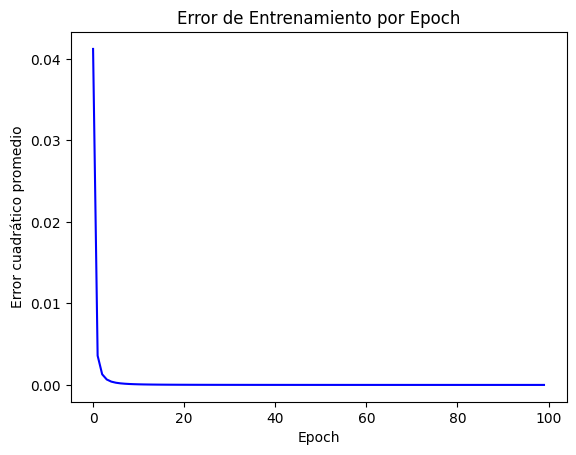

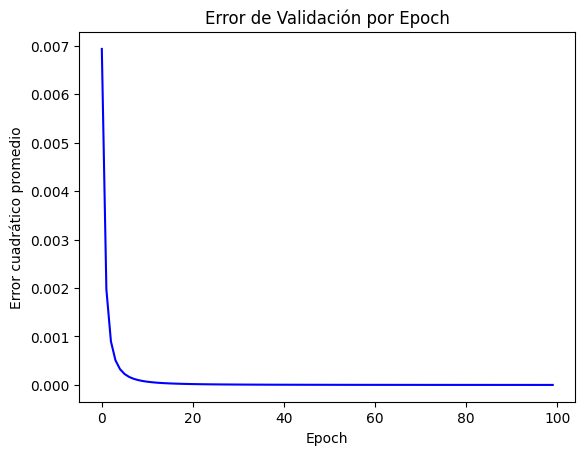

In [7]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [8]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: 0.9986272906455688
Prediction: 1


In [9]:
# Evaluamos cómo funciona el modelo en el set de validación
## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion

predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for i in range(len(X_validation)):
  prob = perceptron_and.predict(X_validation[i])
  if prob> 0.5:
    pred = 1
  else:
    pred=0
  predictions.append(pred)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[745   0]
 [  0 254]]


In [10]:
# Evaluamos cómo funciona el modelo en el set de test
N_samples = 1000
N_inputs = 2
N_test = int(N_samples)

## Generar el set de test (de forma similar al de validación)
X_test = np.random.randint(0, 2, size=(N_test, N_inputs)) ## a completar
Y_test = np.all(X_test, axis=1).astype(int) ## a completar

## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
predictions = []
for i in range(len(X_test)):
  prob = perceptron_and.predict(X_test[i])
  if prob > 0.5:
    pred = 1
  else:
    pred = 0
  predictions.append(pred)

## Calcula la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions) ## a completar

## Visualiza la matriz de confusión
print("Matriz de Confusión - Test:")
print(conf_matrix_test) ## a completar

Matriz de Confusión - Test:
[[759   0]
 [  0 241]]
